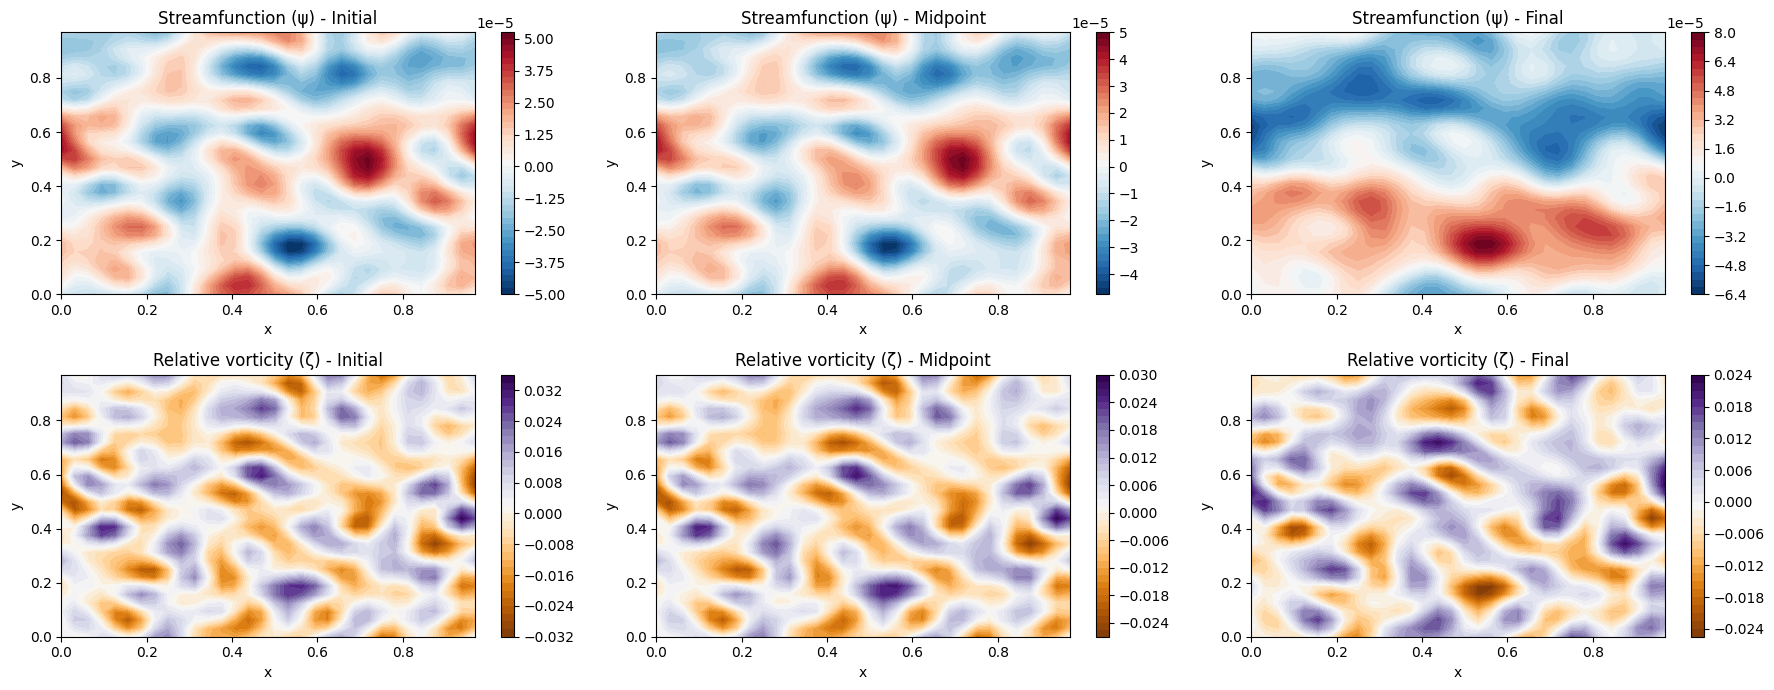

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyteda.models import QGModel

# --- Parameters ---
N = 32
dt = 0.01
tend = 5
F = 1600.0
nt = int(tend / dt)

# --- Model Initialization ---
model = QGModel(N=N, dt=dt, F=F)
T = np.linspace(0, tend, nt + 1)

# --- Initial condition (generated and propagated internally) ---
x0 = model.get_initial_condition(seed=42)  # ψ and q
snapshots = []

# --- Manual propagation (no analysis or observations) ---
x = x0.copy()
for step in range(nt):
    x = model.propagate(x, T[:2])  # one short step
    T[:2] += dt  # advance time

    if step in [0, nt // 2, nt - 1]:
        q = x[:N*N].reshape(N, N)
        psi = x[N*N:].reshape(N, N)
        snapshots.append((psi.copy(), model.laplacian(psi).copy()))

# --- Visualization ---
x = np.linspace(0, 1, N, endpoint=False)
y = np.linspace(0, 1, N, endpoint=False)
X, Y = np.meshgrid(x, y)

fig, axes = plt.subplots(2, 3, figsize=(18, 7))
labels = ['Initial', 'Midpoint', 'Final']

for i, (psi_snap, zeta_snap) in enumerate(snapshots):
    im1 = axes[0, i].contourf(X, Y, psi_snap, levels=40, cmap='RdBu_r')
    axes[0, i].set_title(f'Streamfunction (ψ) - {labels[i]}')
    plt.colorbar(im1, ax=axes[0, i])

    im2 = axes[1, i].contourf(X, Y, zeta_snap, levels=40, cmap='PuOr')
    axes[1, i].set_title(f'Relative vorticity (ζ) - {labels[i]}')
    plt.colorbar(im2, ax=axes[1, i])

for ax in axes.flat:
    ax.set_xlabel('x')
    ax.set_ylabel('y')

plt.tight_layout()
plt.show()

